In [10]:
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.signal import welch
import pandas as pd
import seaborn
import numpy as np
from matplotlib.colors import LogNorm
import math  #<......necesario
Samples = 201

In [6]:
#Tamaño de un bin = (max(x)-min(x)) * (2*(x.75-x.25)^-1) * n^{1/3}

#x.75 y x.25 son los cuartiles de la mustra, es decir los valores que acumulan .25 y .75 de probabilidad
#suponindo que tomamos a todos los elementos de la matriz con igual probabilidad 1/(#elementos)
#los cuartiles surgen de ordenar los elementos 
#y tomar el que deje 1/4 de probabilidad(#elementos) a la derecha = x25
#y el que deje 1/4 de probabilidad(#elementos) a la izquierda = x75

In [11]:
def calculate_serie(electrodo_matrix, electrodo_serie, min_val, t_bin):
    tam_fila = electrodo_matrix.shape[0] #cant_epochs
    tam_columna = electrodo_matrix.shape[1] #cant_muestras

    vec = np.zeros(9)
    a = 0

    for i in range(0,tam_fila):
        for j in range(0,tam_columna):
            if ((electrodo_matrix[i][j] < (min_val+t_bin))):
                vec[0]=vec[0]+1
                electrodo_serie[i][j] = ord('A')
                a=a+1
            if ((electrodo_matrix[i][j] < (min_val+2*t_bin)) & (electrodo_matrix[i][j] >= (min_val+t_bin))):
                vec[1]=vec[1]+1
                electrodo_serie[i][j] = ord('B')
                a=a+1
            if ((electrodo_matrix[i][j] < (min_val+3*t_bin)) & (electrodo_matrix[i][j] >= (min_val+2*t_bin))):
                vec[2]=vec[2]+1
                electrodo_serie[i][j] = ord('C')
                a=a+1
            if ((electrodo_matrix[i][j] < (min_val+4*t_bin)) & (electrodo_matrix[i][j] >= (min_val+3*t_bin))):
                vec[3]=vec[3]+1
                electrodo_serie[i][j] = ord('D')
                a=a+1
            if ((electrodo_matrix[i][j] < (min_val+5*t_bin)) & (electrodo_matrix[i][j] >= (min_val+4*t_bin))):
                vec[4]=vec[4]+1
                electrodo_serie[i][j] = ord('E')
                a=a+1
            if ((electrodo_matrix[i][j] < (min_val+6*t_bin)) & (electrodo_matrix[i][j] >= (min_val+5*t_bin))):
                vec[5]=vec[5]+1
                electrodo_serie[i][j] = ord('F')
                a=a+1
            if ((electrodo_matrix[i][j] < (min_val+7*t_bin)) & (electrodo_matrix[i][j] >= (min_val+6*t_bin))):
                vec[6]=vec[6]+1
                electrodo_serie[i][j] = ord('G')
                a=a+1
            if ((electrodo_matrix[i][j] < (min_val+8*t_bin)) & (electrodo_matrix[i][j] >= (min_val+7*t_bin))):
                vec[7]=vec[7]+1
                electrodo_serie[i][j] = ord('H')
                a=a+1
            if (electrodo_matrix[i][j] >= (min_val+8*t_bin)):
                vec[8]=vec[8]+1
                electrodo_serie[i][j] = ord('I')
                a=a+1
    return vec/(tam_fila * tam_columna)
    #return vec/n
    #print (tam_fila*tam_columna)-a

In [12]:
electrodo_8_serie = np.zeros((cant_epochs, cant_muestras))
electrodo_44_serie = np.zeros((cant_epochs, cant_muestras))
electrodo_80_serie = np.zeros((cant_epochs, cant_muestras))
electrodo_131_serie = np.zeros((cant_epochs, cant_muestras))
electrodo_185_serie = np.zeros((cant_epochs, cant_muestras))

#print min_valor('B')
#print t_bin

proba_8 = calculate_serie(electrodo_8_matrix,electrodo_8_serie, min_val, t_bin)
proba_44 = calculate_serie(electrodo_44_matrix,electrodo_44_serie, min_val, t_bin)
proba_80 = calculate_serie(electrodo_80_matrix,electrodo_80_serie, min_val, t_bin)
proba_131 = calculate_serie(electrodo_131_matrix,electrodo_131_serie, min_val, t_bin)
proba_185 = calculate_serie(electrodo_185_matrix,electrodo_185_serie, min_val, t_bin)

In [15]:
#entropia = -sum(p(i),log(p(i)))
def calculate_entropia(proba_x):
    res=0
    for i in range(0,len(proba_x)):
        res = res + (proba_x[i]/(cant_epochs*cant_muestras))*math.log((proba_x[i]/(cant_epochs*cant_muestras))+1,10)
    print -res

In [16]:
calculate_entropia(proba_8)
calculate_entropia(proba_44)
calculate_entropia(proba_80)
calculate_entropia(proba_131)
calculate_entropia(proba_185)

-1.34236324601e-11
-1.34441165765e-11
-1.3445762643e-11
-1.34370856553e-11
-1.34188523539e-11


## V2

In [21]:
def calculate_bin_max_min(matrix_sujeto):
    cant_electrodos = matrix_sujeto.shape[1]
    x25 = np.zeros(cant_electrodos)
    x75 = np.zeros(cant_electrodos)
    maximum = np.zeros(cant_electrodos)
    minimum = np.zeros(cant_electrodos)
    
    for i in range(0,cant_electrodos):
        electrodo_actual = np.copy(matrix_sujeto[:, i, :])
        np.sort(electrodo_actual, axis=None)

        maximum[i] = electrodo_actual.max()
        minimum[i] = electrodo_actual.min()
        x75[i] = np.percentile(electrodo_actual, 75)
        x25[i] = np.percentile(electrodo_actual, 25)
        
    return maximum, minimum, x75, x25

In [22]:
def calculate_tbin(maximum, minimum, x75, x25):
    n_instances = 201 * 894
    return 2 * (x75-x25) / (math.pow(n_instances,1.0/3))

In [23]:
# numpy arange step
def calculate_serie(electrodo_matrix, max_val, min_val, t_bin):
    bins = np.arange(min_val, max_val, t_bin)
    acum = np.zeros(bins.shape[0] - 1)
    for i in range(0, electrodo_matrix.shape[0]):
        hist, _ = np.histogram(electrodo_matrix[i,:], bins=bins)
        acum = acum + hist
    return (acum / float(electrodo_matrix.shape[0] * electrodo_matrix.shape[1]))

In [28]:
def calculate_entropia(proba_x, cant_epochs, cant_muestras):
    res=0
    for i in range(0,len(proba_x)):
        res = res + (proba_x[i]/(cant_epochs*cant_muestras))*math.log((proba_x[i]/(cant_epochs*cant_muestras))+1,10)
    return -res

In [37]:
def entropias_electrodos_por_sujeto(filename):
    p01 = sio.loadmat(filename)
    matrix_p01 = p01['data']
    cant_epochs = matrix_p01.shape[0]
    cant_electrodos = matrix_p01.shape[1]
    cant_muestras = matrix_p01.shape[2] 
    
    maximum_values, minimum_values, x75_values, x25_values = calculate_bin_max_min(matrix_p01)
    
    entropia_por_electrodo = []
    for i in range(cant_electrodos):
        electrodo_i_matrix = matrix_p01[:, i, :]
        t_bin = calculate_tbin(maximum_values[i], minimum_values[i], x75_values[i], x25_values[i])
        probabilities = calculate_serie(electrodo_i_matrix, maximum_values[i], minimum_values[i], t_bin)
        entropia_por_electrodo.append(calculate_entropia(probabilities, cant_epochs, cant_muestras))
    return entropia_por_electrodo

In [38]:
filename = "/Users/lmatayoshi/Desktop/EEG/P01.mat"

In [39]:
res = entropias_electrodos_por_sujeto(filename)

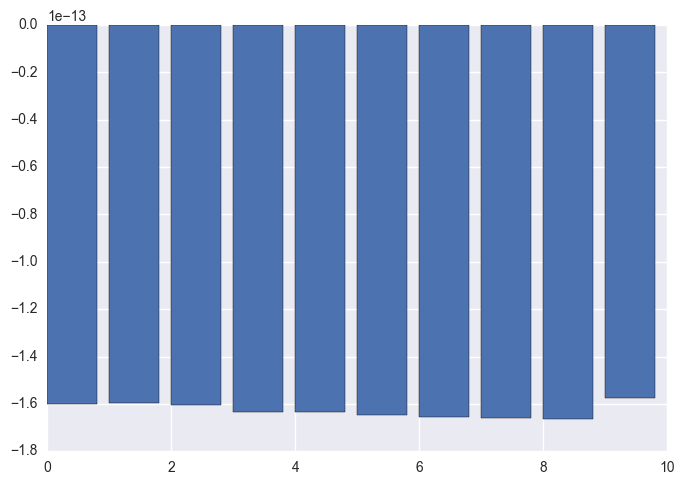

In [42]:
plt.bar(range(len(res[:10])), res[:10])
plt.show()